In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

from ffnavpy.satellite import Satellite, OBC
from ffnavpy.simulator import Simulator
from ffnavpy.simcase import ChiefDeputyCase
from ffnavpy.satellite import CommandSequence


c:\Users\juan.bermejo\.conda\envs\ffnavpy-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
atol = 1e-7
rtol = 1e-6
ftol = 1e-7

In [9]:
# Initial state of deputy [km, km/s]

x0 = np.array(
    [
        1.5097937630e11,
        -4.6840029080e-08,
        1.8369701987e-08,
        -6.0196990433e-15,
        1.5667113355e02,
        -1.1858897424e02,
    ]
)  # [m / m/s], 'P1-IdealSynodic', Sun-Earth

# x0 = np.array([ 1.51287312e+08,  0.00000000e+00, -7.70118240e+04,  2.38772827e-14,
#        -2.68181170e-01,  0.00000000e+00])

# Initial relative state [km, km/s]
dx0 = np.array([0.110*0, 0.09, 0.080, 1e-6, 0.00001, 0.000020])*1000

# Initial state chief [km, km/s]
x0_cs = x0 + dx0

# State commanded
x_target = np.array([0, 80, 80, 0, 0, 0])

# Duration of the simulation [s]
tf = 3600*2

# Time step of simulation [s]
dT = 1

# Create satellites with their corresponding initial states
LiteBird = Satellite(x0,1,70)
CalSat = Satellite(x0_cs,1,7)

# OBC config
t_star = OBC.DefConfigOBC.ts

ConfigOBC = {'x_target': x_target, 
             'estimation_mode': 'kalman',
             'control_mode': None,
             'Tsk': 1,
             'sigma_r0': 1e-7,
             'sigma_v0': 1e-8,
             'sigma_x': 1e-4,
             'sigma_y': 1e-4,
             'sigma_z': 1e-4,
             'period': 300,
             'horizon': 10,
             'u_threshold_v': np.ones(3) * 0.01,
             'x_threshold': np.concatenate([0.1*np.ones(3),0.0005*np.ones(3)]),
             'collision_avoidance': True,
             'Rkoz': 80,
             'atol': atol,
             'rtol': rtol,
             'ftol': ftol
             }

configSim = {'sigma_distance': 1e-06, 'sigma_angle': 0.25}

cmd_sequence = CommandSequence()
cmd_sequence.add_command('change_control_mode', 'MPC', 100)


# new_x_target = np.array([0, 0, 100, 0, 0, 0])
# cmd_sequence.add_command('change_x_target', new_x_target, 2000)


new_x_target = np.array([-20*0, -100, -100, 0, 0, 0])
cmd_sequence.add_command('change_x_target', new_x_target, 500)
# cmd_sequence.add_command('change_estimation_mode', 'kalman', 3000)
# cmd_sequence.add_command('change_control_mode', 'LQR', 4800)
# cmd_sequence.add_command('change_control_mode', 'ETM', 3600*2)

# Create predefined case for chief-deputy formation
# simcase = ChiefDeputyCase(LiteBird, CalSat, cmd_sequence=cmd_sequence, configOBC=ConfigOBC)
simcase = ChiefDeputyCase(LiteBird, CalSat, configOBC=ConfigOBC, cmd_sequence=cmd_sequence)

sim = Simulator(simcase, dT)
# Simulate
sim.simulate(tf)


100%|██████████| 7201/7201 [15:56<00:00,  7.53it/s]  


0

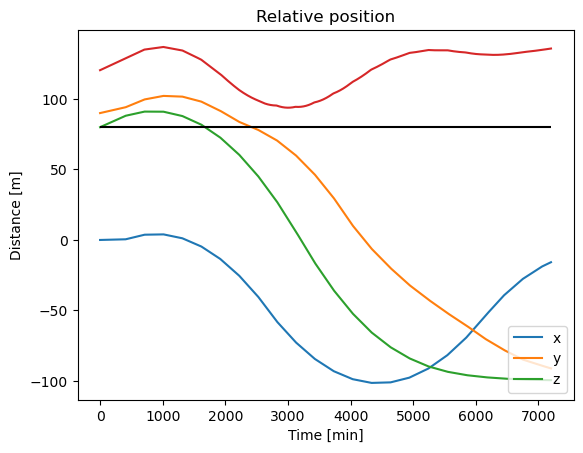

In [4]:
plt.plot(sim.report.time,sim.report.relative_state[:3].T)
plt.plot(sim.report.time,sim.report.d)

plt.title('Relative position')
plt.xlabel('Time [min]')
plt.ylabel('Distance [m]')
plt.hlines(80, 0, tf,'k')
plt.legend(['x', 'y', 'z'], loc=4)


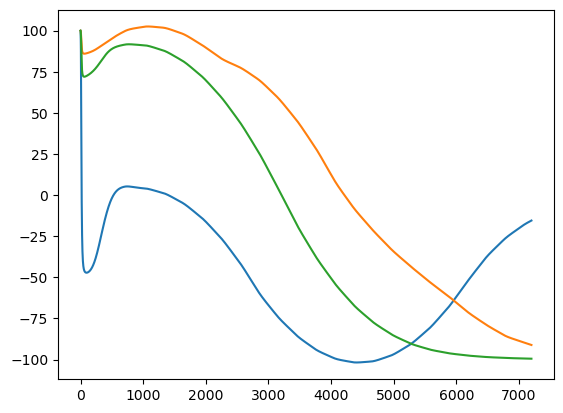

In [5]:
plt.plot(sim.report.x_estimated[0:3].T)

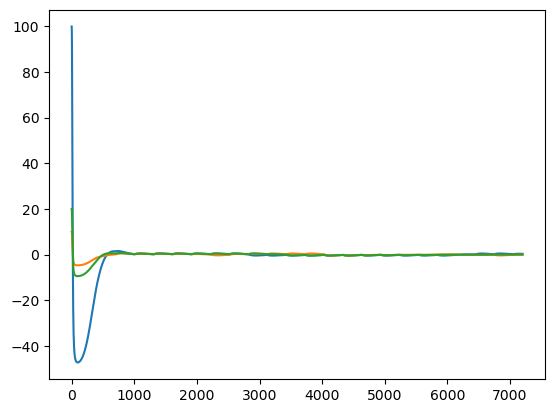

In [6]:
plt.plot(sim.report.x_estimated[0:3].T - sim.report.relative_state[0:3].T)

In [7]:
cmd_sequence.print()

{'operation': 'change_control_mode', 'value': 'MPC', 'time': 100, 'status': True}
{'operation': 'change_x_target', 'value': array([   0, -100, -100,    0,    0,    0]), 'time': 500, 'status': True}


0

In [8]:
cmd_sequence._cmd_seq[1].__dict__

{'operation': 'change_x_target',
 'value': array([   0, -100, -100,    0,    0,    0]),
 'time': 500,
 'status': True}